In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pylab as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import seaborn as sns

from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Lasso
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression

# Data preproccising

In [2]:
df=pd.read_csv('survey_lung_cancer.csv')

In [3]:
df.head(5)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [4]:
#df["Fatigue"]=df["FATIGUE"]

In [5]:
df.shape


(309, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [7]:
features=df.columns
for feature in features:
     print(f'{feature}--->{df[feature].nunique()}')

GENDER--->2
AGE--->39
SMOKING--->2
YELLOW_FINGERS--->2
ANXIETY--->2
PEER_PRESSURE--->2
CHRONIC DISEASE--->2
FATIGUE --->2
ALLERGY --->2
WHEEZING--->2
ALCOHOL CONSUMING--->2
COUGHING--->2
SHORTNESS OF BREATH--->2
SWALLOWING DIFFICULTY--->2
CHEST PAIN--->2
LUNG_CANCER--->2


In [8]:
df.describe().T.sort_values(ascending =0,by='mean').style.background_gradient(cmap='BuGn').bar(subset=['std'], color='red').bar(subset=['mean'], color='blue')

,count,mean,std,min,25%,50%,75%,max
AGE,309.000000,62.673139,8.210301,21.000000,57.000000,62.000000,69.000000,87.000000
FATIGUE,309.000000,1.673139,0.469827,1.000000,1.000000,2.000000,2.000000,2.000000
SHORTNESS OF BREATH,309.000000,1.640777,0.480551,1.000000,1.000000,2.000000,2.000000,2.000000
COUGHING,309.000000,1.579288,0.494474,1.000000,1.000000,2.000000,2.000000,2.000000
YELLOW_FINGERS,309.000000,1.569579,0.495938,1.000000,1.000000,2.000000,2.000000,2.000000
SMOKING,309.000000,1.563107,0.496806,1.000000,1.000000,2.000000,2.000000,2.000000
ALLERGY,309.000000,1.556634,0.497588,1.000000,1.000000,2.000000,2.000000,2.000000
WHEEZING,309.000000,1.556634,0.497588,1.000000,1.000000,2.000000,2.000000,2.000000
ALCOHOL CONSUMING,309.000000,1.556634,0.497588,1.000000,1.000000,2.000000,2.000000,2.000000
CHEST PAIN,309.000000,1.556634,0.497588,1.000000,1.000000,2.000000,2.000000,2.000000


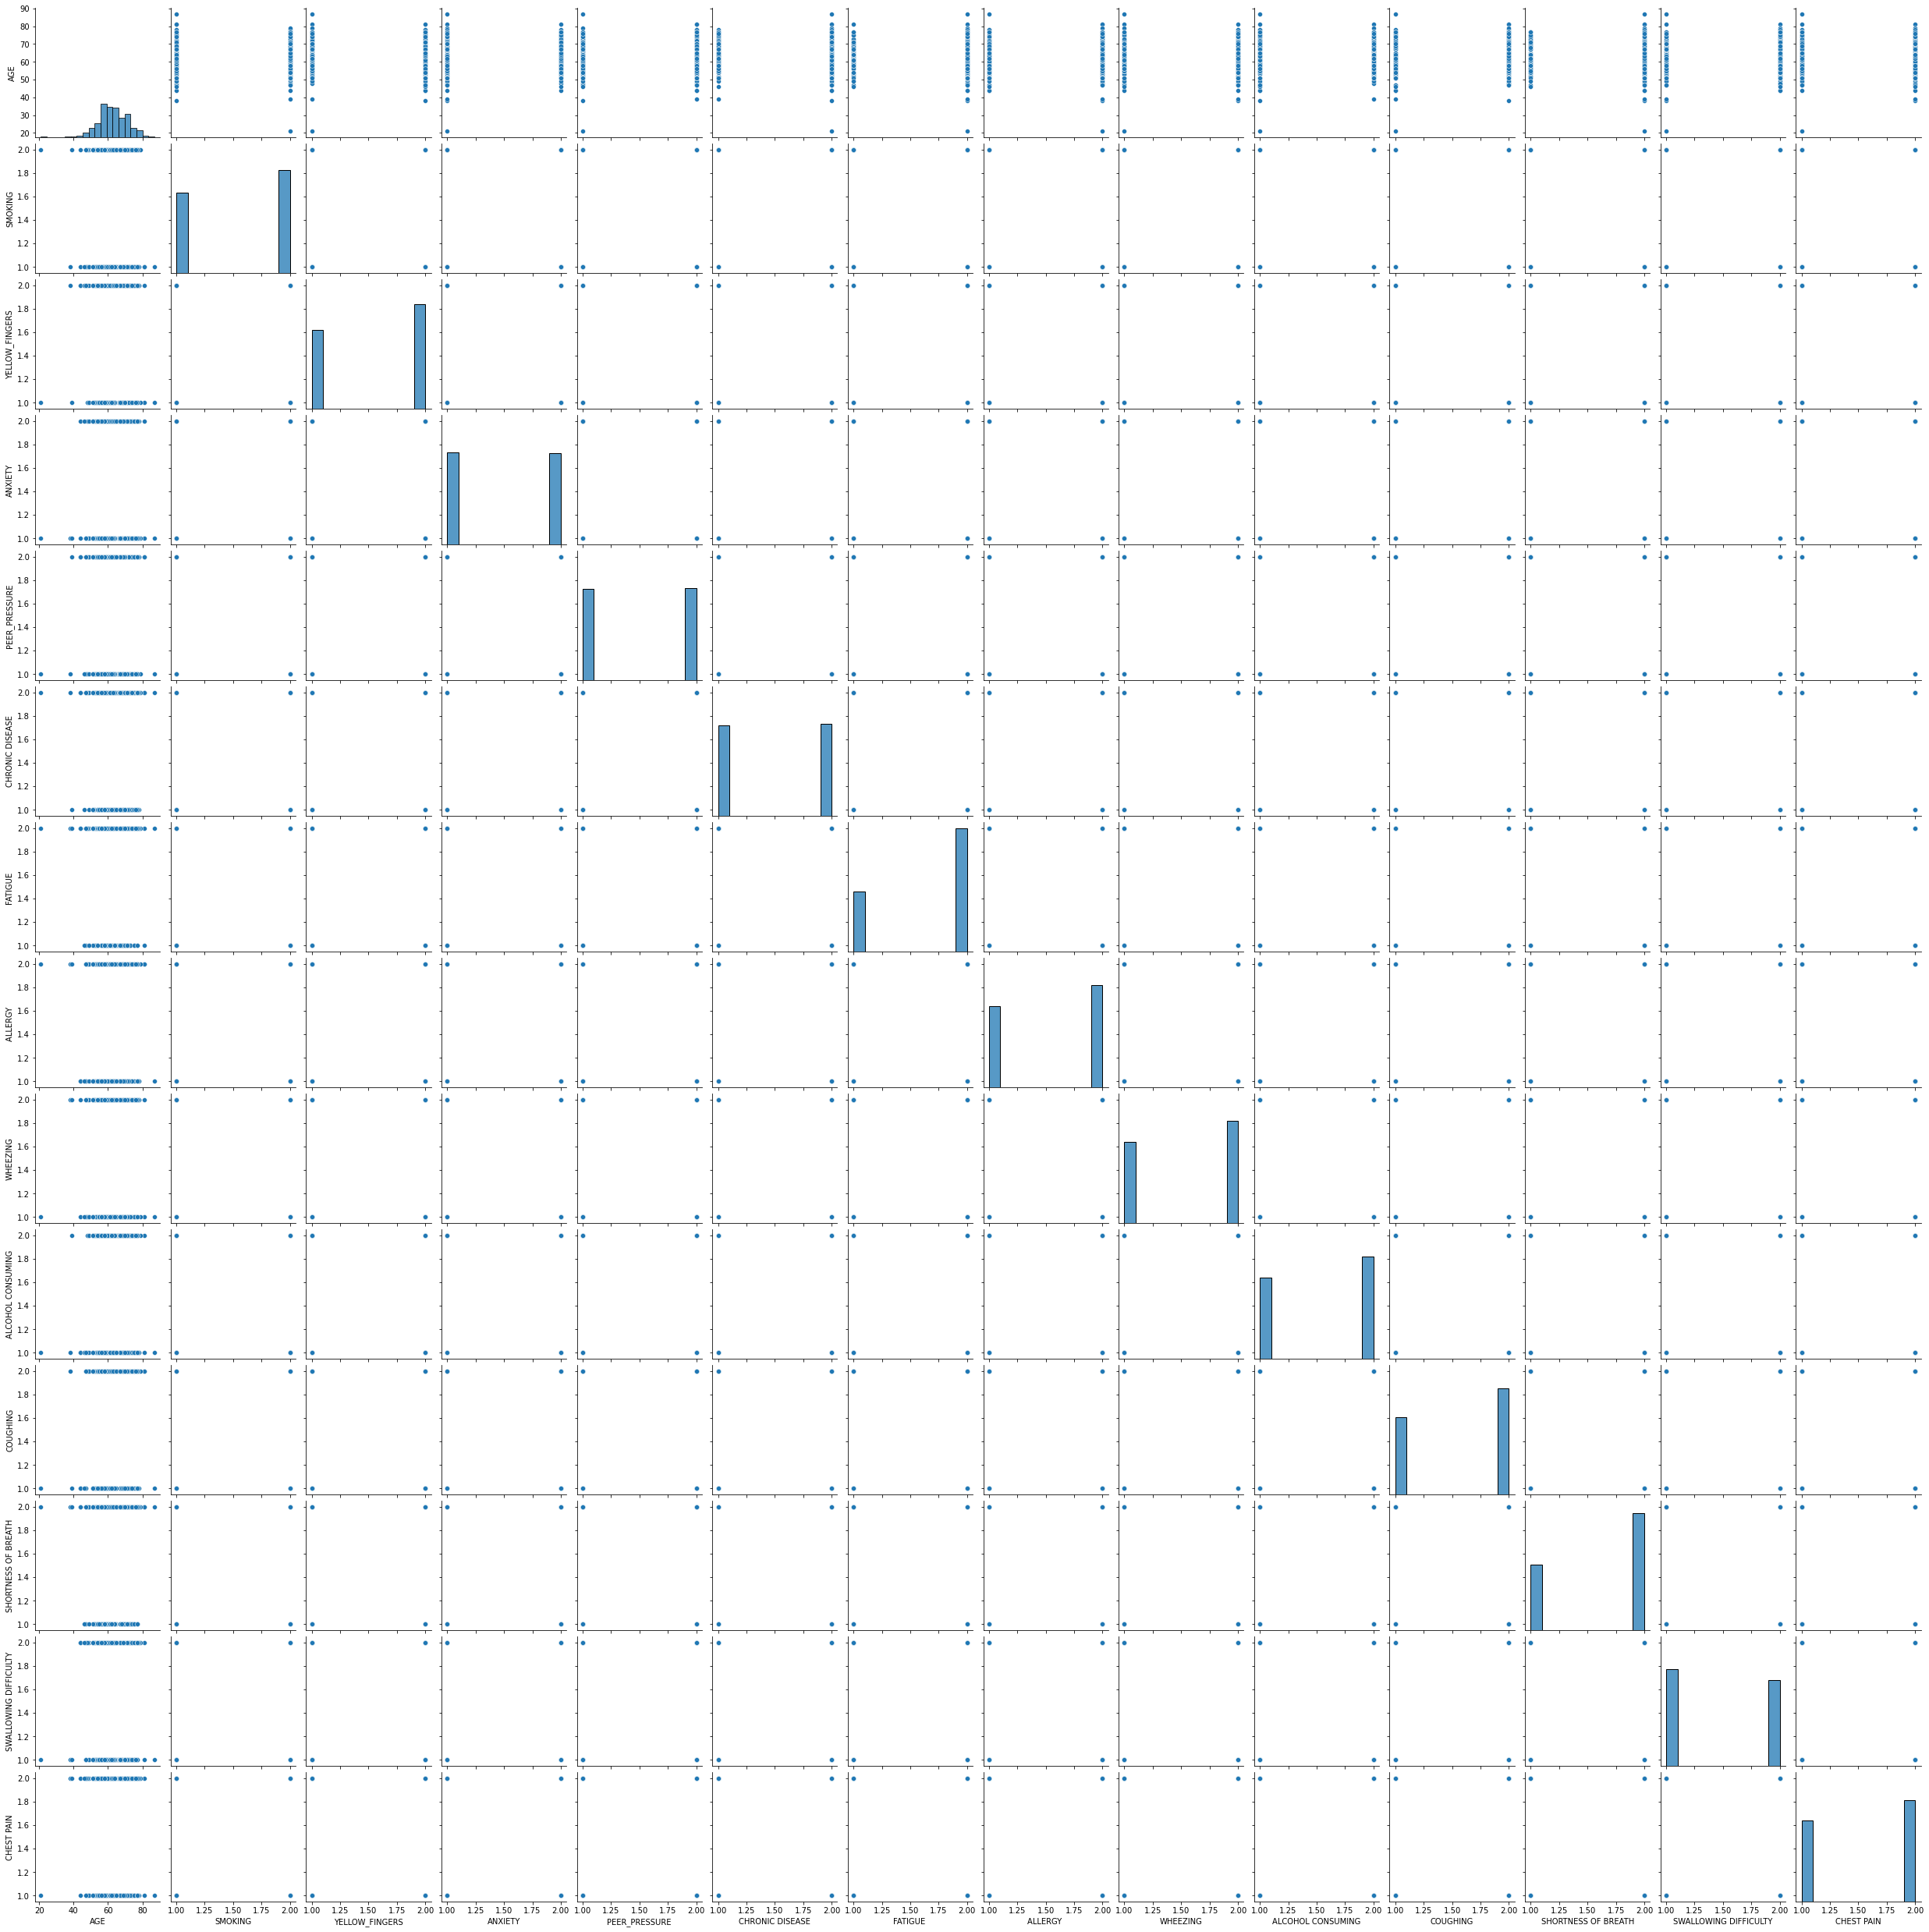

In [9]:

sns.pairplot(df)

In [10]:
df.corr().style.background_gradient(cmap='viridis')

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
AGE,1.000000,-0.084475,0.005205,0.053170,0.018685,-0.012642,0.012614,0.027990,0.055011,0.058985,0.169950,-0.017513,-0.001270,-0.018104
SMOKING,-0.084475,1.000000,-0.014585,0.160267,-0.042822,-0.141522,-0.029575,0.001913,-0.129426,-0.050623,-0.129471,0.061264,0.030718,0.120117
YELLOW_FINGERS,0.005205,-0.014585,1.000000,0.565829,0.323083,0.041122,-0.118058,-0.144300,-0.078515,-0.289025,-0.012640,-0.105944,0.345904,-0.104829
ANXIETY,0.053170,0.160267,0.565829,1.000000,0.216841,-0.009678,-0.188538,-0.165750,-0.191807,-0.165750,-0.225644,-0.144077,0.489403,-0.113634
PEER_PRESSURE,0.018685,-0.042822,0.323083,0.216841,1.000000,0.048515,0.078148,-0.081800,-0.068771,-0.159973,-0.089019,-0.220175,0.366590,-0.094828
CHRONIC DISEASE,-0.012642,-0.141522,0.041122,-0.009678,0.048515,1.000000,-0.110529,0.106386,-0.049967,0.002150,-0.175287,-0.026459,0.075176,-0.036938
FATIGUE,0.012614,-0.029575,-0.118058,-0.188538,0.078148,-0.110529,1.000000,0.003056,0.141937,-0.191377,0.146856,0.441745,-0.132790,-0.010832
ALLERGY,0.027990,0.001913,-0.144300,-0.165750,-0.081800,0.106386,0.003056,1.000000,0.173867,0.344339,0.189524,-0.030056,-0.061508,0.239433
WHEEZING,0.055011,-0.129426,-0.078515,-0.191807,-0.068771,-0.049967,0.141937,0.173867,1.000000,0.265659,0.374265,0.037834,0.069027,0.147640
ALCOHOL CONSUMING,0.058985,-0.050623,-0.289025,-0.165750,-0.159973,0.002150,-0.191377,0.344339,0.265659,1.000000,0.202720,-0.179416,-0.009294,0.331226


In [11]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

<AxesSubplot:xlabel='AGE'>

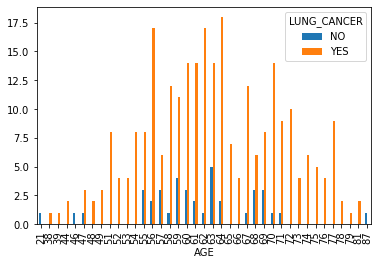

In [12]:
pd.crosstab(df['AGE'], df['LUNG_CANCER']).plot(kind='bar')

In [13]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

<AxesSubplot:xlabel='LUNG_CANCER', ylabel='count'>

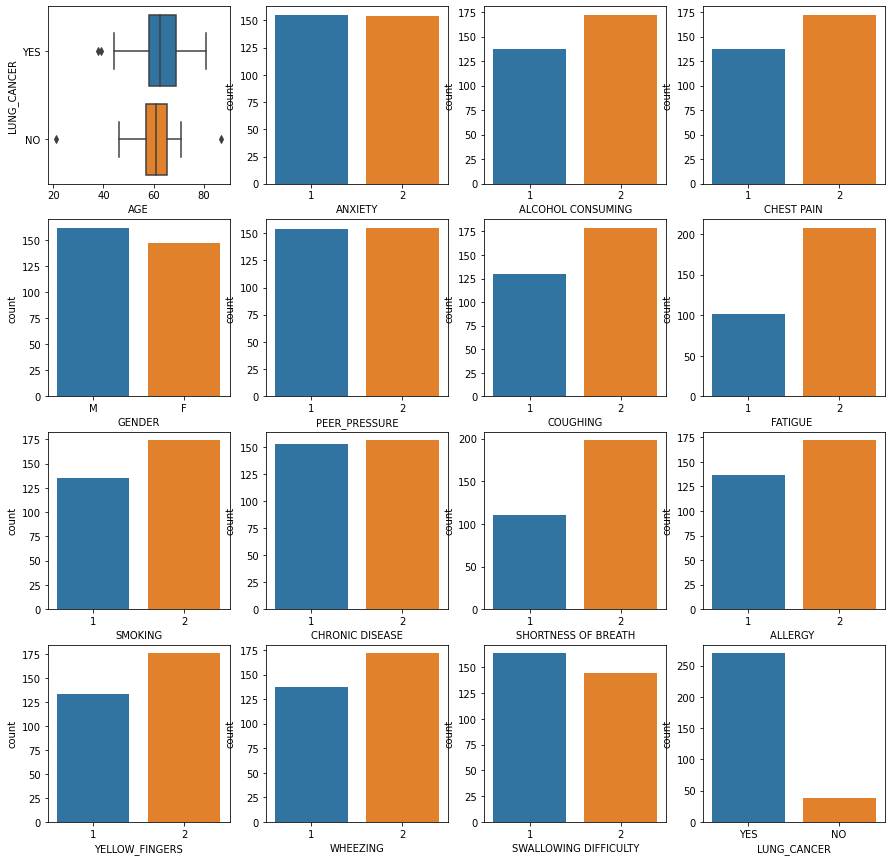

In [14]:
f, ax = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

#fig, axes = plt.subplots((2, 2),figsize=(15, 15))

#create chart in each subplot
sns.boxplot(data=df, x='AGE', y='LUNG_CANCER', ax=ax[0,0])
sns.countplot(x='GENDER',data=df,  ax=ax[1,0])
sns.countplot(x='SMOKING',data=df,  ax=ax[2,0])
sns.countplot(x='YELLOW_FINGERS',data=df,  ax=ax[3,0])
sns.countplot(x='ANXIETY',data=df,  ax=ax[0,1])
sns.countplot(x='PEER_PRESSURE',data=df,  ax=ax[1,1])
sns.countplot(x='CHRONIC DISEASE',data=df,  ax=ax[2,1])
sns.countplot(x='WHEEZING',data=df,  ax=ax[3,1])
sns.countplot(x='ALCOHOL CONSUMING',data=df,  ax=ax[0,2])
sns.countplot(x='COUGHING',data=df,  ax=ax[1,2])
sns.countplot(x='SHORTNESS OF BREATH',data=df,  ax=ax[2,2])
sns.countplot(x='SWALLOWING DIFFICULTY',data=df,  ax=ax[3,2])
sns.countplot(x='CHEST PAIN',data=df,  ax=ax[0,3])
sns.countplot(x='FATIGUE ',data=df,  ax=ax[1,3])
sns.countplot(x='ALLERGY ',data=df,  ax=ax[2,3])
sns.countplot(x='LUNG_CANCER',data=df,  ax=ax[3,3])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


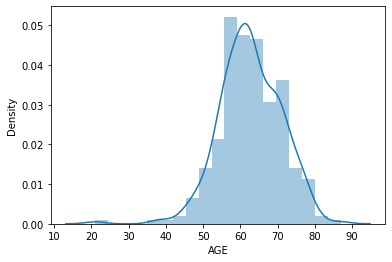

In [15]:
sns.distplot(df['AGE'])
plt.show()

In [16]:
df.replace({"GENDER":{'F':0,'M':1}},inplace=True)
df.replace({"LUNG_CANCER":{'NO':0,'YES':1}},inplace=True)

In [17]:
df.head(5)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


# ML model

In [18]:
df['LUNG_CANCER'].value_counts()

1    270
0     39
Name: LUNG_CANCER, dtype: int64

In [19]:
X=df.drop(['LUNG_CANCER'],axis='columns')
y=df['LUNG_CANCER']

In [20]:
len(X)

309

In [21]:
len(y)

309

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=5)

In [23]:
len(X_train)

247

In [24]:
X_train.shape

(247, 15)

In [25]:
y_train.shape

(247,)

In [26]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [27]:
X_train[:5]

array([[-1.04557178, -1.90334439,  0.85280287,  0.88146379, -1.02045201,
         1.06269015,  1.02045201,  0.69853547,  0.9486833 ,  0.90342486,
        -1.09788758,  0.85990501,  0.73086352, -0.9258201 , -1.08012345],
       [ 0.95641449,  0.03581958, -1.17260394,  0.88146379, -1.02045201,
         1.06269015, -0.97995789,  0.69853547,  0.9486833 ,  0.90342486,
         0.91084007,  0.85990501,  0.73086352, -0.9258201 ,  0.9258201 ],
       [-1.04557178, -0.93376241,  0.85280287, -1.13447655,  0.97995789,
        -0.94100807, -0.97995789,  0.69853547, -1.05409255, -1.10689892,
        -1.09788758, -1.16291915, -1.3682445 , -0.9258201 , -1.08012345],
       [-1.04557178,  0.88420382, -1.17260394,  0.88146379, -1.02045201,
        -0.94100807,  1.02045201,  0.69853547,  0.9486833 ,  0.90342486,
        -1.09788758,  0.85990501,  0.73086352, -0.9258201 ,  0.9258201 ],
       [ 0.95641449, -0.32777367,  0.85280287, -1.13447655, -1.02045201,
        -0.94100807,  1.02045201, -1.43156653, 

In [28]:
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

model_params = {
             
    
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
   
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
        }   
    },
       'XGB_Classifier':{
        'model':XGBClassifier(),
        'params':{
            'base_score':[0.5]
            
        }
    } 
        
     
}


In [29]:
from sklearn.model_selection import GridSearchCV
scores = []
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=cv, return_train_score=False)
    clf.fit(X,y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,random_forest,0.925806,{'n_estimators': 10}
1,logistic_regression,0.925806,{'C': 10}
2,naive_bayes_gaussian,0.900000,{}
3,decision_tree,0.887097,{'criterion': 'gini'}
4,XGB_Classifier,0.900000,{'base_score': 0.5}


In [30]:
model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr',
                           random_state=0)
model.fit(X_train, y_train)


LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [31]:
model.score( X_test, y_test)

0.9354838709677419

In [32]:
y_predicted = model.predict(X_test)

In [33]:
y_predicted [:5]

array([1, 1, 1, 1, 0], dtype=int64)

In [34]:
y_test[:5]

274    1
308    1
307    1
48     1
281    0
Name: LUNG_CANCER, dtype: int64

In [35]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.67      0.40      0.50         5
           1       0.95      0.98      0.97        57

    accuracy                           0.94        62
   macro avg       0.81      0.69      0.73        62
weighted avg       0.93      0.94      0.93        62



In [36]:
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[ 2,  3],
       [ 1, 56]], dtype=int64)

Text(69.0, 0.5, 'Truth')

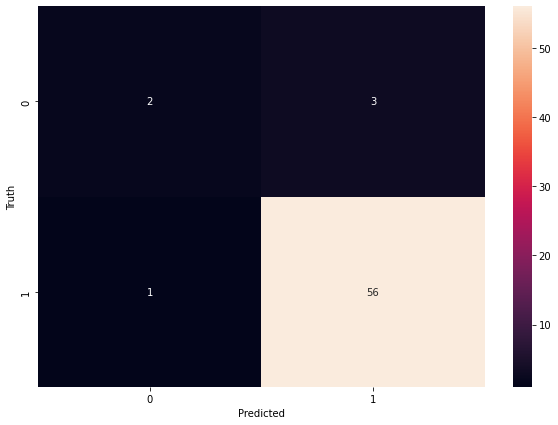

In [37]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [38]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_predicted)
print(f'{mean_squared_error}: {mse}')

<function mean_squared_error at 0x0000024362C88310>: 0.06451612903225806


In [39]:
model.intercept_

array([1.31992042])

# Deep learing test

In [40]:
mode = keras.Sequential([
    keras.layers.Dense(15, input_dim=15, activation='relu'),
    keras.layers.Dropout(0.5),#Dropout Layer
    keras.layers.Dense(7, activation='relu'),
    keras.layers.Dropout(0.5),#Dropout Layer
        keras.layers.Dense(1, activation='sigmoid')
])

mode.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

mode.fit(X_train, y_train, epochs=100, batch_size=8)

Epoch 1/100
31/31 [==============================] - 1s 1ms/step - loss: 0.5837 - accuracy: 0.7490
Epoch 2/100
31/31 [==============================] - 0s 915us/step - loss: 0.5556 - accuracy: 0.7652
Epoch 3/100
31/31 [==============================] - 0s 846us/step - loss: 0.6019 - accuracy: 0.7733
Epoch 4/100
31/31 [==============================] - 0s 884us/step - loss: 0.5252 - accuracy: 0.7814
Epoch 5/100
31/31 [==============================] - 0s 833us/step - loss: 0.5011 - accuracy: 0.8097
Epoch 6/100
31/31 [==============================] - 0s 871us/step - loss: 0.5013 - accuracy: 0.8138
Epoch 7/100
31/31 [==============================] - 0s 969us/step - loss: 0.4759 - accuracy: 0.8300
Epoch 8/100
31/31 [==============================] - 0s 922us/step - loss: 0.4238 - accuracy: 0.8259
Epoch 9/100
31/31 [==============================] - 0s 816us/step - loss: 0.4019 - accuracy: 0.8178
Epoch 10/100
31/31 [==============================] - 0s 944us/step - loss: 0.4388 - accuracy

In [41]:
mode.evaluate(X_test, y_test)

2/2 [==============================] - 0s 16ms/step - loss: 0.1458 - accuracy: 0.9194


[0.14580276608467102, 0.9193548560142517]

In [42]:
ypre=mode.predict(X_test).reshape(-1)

2/2 [==============================] - 0s 0s/step


In [43]:
ypre

array([0.9981251 , 0.9994751 , 0.99995905, 1.        , 0.7985516 ,
       0.5426204 , 0.9219231 , 0.9899258 , 0.9999943 , 0.9999973 ,
       0.8997866 , 0.99998045, 0.99999976, 0.8938605 , 0.93070036,
       0.98608285, 1.        , 0.9017404 , 0.9999891 , 1.        ,
       0.9980121 , 0.90461814, 0.9247224 , 0.9999898 , 0.99953425,
       0.99984914, 0.99995655, 0.9999997 , 0.99997747, 0.99926746,
       1.        , 0.9966603 , 0.99999833, 0.9999965 , 0.82237047,
       0.99951774, 0.9991079 , 0.58585936, 0.9999976 , 0.9999991 ,
       0.99999845, 0.90847844, 0.9977479 , 1.        , 0.99983746,
       0.9999998 , 0.9999571 , 0.9999976 , 1.        , 0.9956126 ,
       0.9999341 , 1.        , 0.9885743 , 0.99734676, 0.9999938 ,
       0.9991681 , 0.9638699 , 0.9999501 , 0.99934196, 0.96866393,
       1.        , 0.9998295 ], dtype=float32)

In [44]:
ypre=np.round(ypre)

In [45]:
ypre

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)

In [46]:
y_test[:10]

274    1
308    1
307    1
48     1
281    0
49     0
33     1
197    1
267    1
53     1
Name: LUNG_CANCER, dtype: int64

In [63]:
print(classification_report(y_test, ypre))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.92      1.00      0.96        57

    accuracy                           0.92        62
   macro avg       0.46      0.50      0.48        62
weighted avg       0.85      0.92      0.88        62



C:\Users\owner\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\owner\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\owner\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(69.0, 0.5, 'Truth')

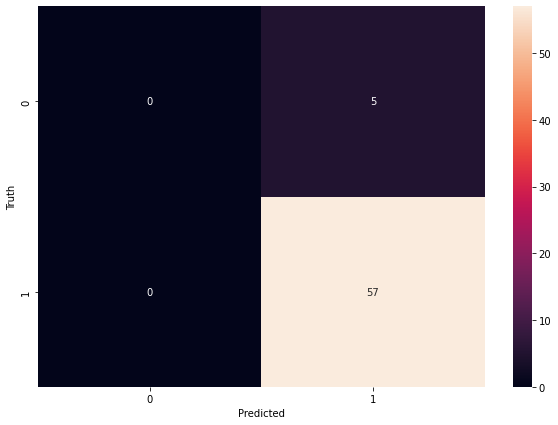

In [64]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test,ypre)
plt.figure(figsize = (10,7))
sns.heatmap(cm1, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')